In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dataset: beer_foam.csv

Source: J.J. Hackbarth (2006). "Multivariate Analyses of Beer Foam Stand,"
Journal of the Institute of Brewing, Vol. 112, #1, pp. 17-24

Description: Measurements of wet foam height and beer height at various
time points for Shiner Bock at 20C. Author fits exponential decay model:
H(t) = H(0)*exp(-lambda*t)

Variables/Columns
TIME: Time from pour (seconds)  4-8
FOAM: Wet foam height (cm)  10-16
BEER: Beer height (cm)    18-24

**Hypothesis**: Can we predict the time from pour using the measurements of foam height and beer height?


In [46]:
# Read the csv file into a pandas DataFrame

data = pd.read_csv('Data/fullDataSetTEST.csv')
data.head()
#removed all NULLS, removed 60654/60642, removed outlier zips (60601, 60602, 60603, 60604)

,Unnamed: 0,long_date,lat,lng,Zip,total_num_crimes,total_num_noise,median_listing_price,active_listing_count,median_days_on_market,...,Income,311_Requests,Liquor_License_Counts,311_Per_Capita,Liquor_License_Per_Capita,School_rating,Bus_Stop_Ct,Bus_Stop_Per_Capita,L_Stop_Ct,L_Stop_Per_Capita
0,62,10/1/2020,41.87,-87.63,60605,5,0,375050.0,460,46.0,...,56151,2357,835,0.19,0.067,8.5,92,0.007406,10.0,0.000805
1,213,10/1/2020,41.86,-87.62,60605,4,0,375050.0,460,46.0,...,56151,2357,835,0.19,0.067,8.5,92,0.007406,10.0,0.000805
2,481,9/1/2020,41.87,-87.63,60605,3,0,382050.0,420,37.0,...,56151,2357,835,0.19,0.067,8.5,92,0.007406,10.0,0.000805
3,531,9/1/2020,41.87,-87.63,60605,3,0,382050.0,420,37.0,...,56151,2357,835,0.19,0.067,8.5,92,0.007406,10.0,0.000805
4,563,9/1/2020,41.87,-87.63,60605,4,0,382050.0,420,37.0,...,56151,2357,835,0.19,0.067,8.5,92,0.007406,10.0,0.000805


In [47]:
data = data.dropna(how='any')

In [69]:
# Assign the data to X and y

X = data[[ "total_num_crimes", "Income", "Bus_Stop_Per_Capita","311_Per_Capita", "311_Per_Capita", "total_num_noise","School_rating", "L_Stop_Per_Capita"  ]]
y = data['median_listing_price_per_square_foot'].values.reshape(-1, 1)
print(X.shape, y.shape)

(28290, 8) (28290, 1)


In [70]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [71]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [72]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6395171225415901
Testing Score: 0.6489891860036194


Text(0.5, 1.0, 'Residual Plot')

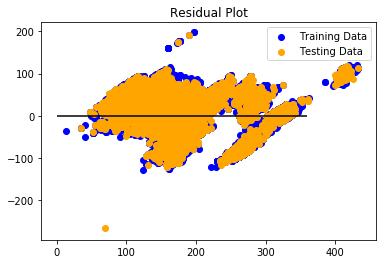

In [73]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [74]:
model.predict(X)

array([[415.15584272],
       [416.87632003],
       [418.59679733],
       ...,
       [192.26450206],
       [188.82354745],
       [187.10307014]])

In [67]:
print(X[0:1])

   total_num_crimes  Income  Bus_Stop_Per_Capita  311_Per_Capita  \
0                 5   56151             0.007406            0.19   

   311_Per_Capita  total_num_noise  School_rating  L_Stop_Per_Capita  
0            0.19                0            8.5           0.000805  
